<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/5.Closed-Loop/Efeitos_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar e importas as bibliotecas necessárias

In [1]:
! pip install -qq control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 8.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp

# Definir uma função para o controlador PID

In [3]:
s = ct.tf('s')
def PID_filtro(Kc, tauI=0.0, tauD=0.0):
  alfa = 0.1
  Gc = Kc
  if tauI != 0.0:
    Gc = Kc*(1 + 1/(tauI*s) + tauD*s/(alfa*tauD*s+1))
  return Gc

# Implementar as funções de transferência

In [7]:
# Processo
Gp = 2.5/((10*s+1)*(4*s+1))

# Transmissor
Gm = 1/(2*s+1)

# Perturbação
Gd = -0.5/(5*s+1)

# Implementar a malha fechada

2 states have been removed from the model
0 states have been removed from the model
2 states have been removed from the model
0 states have been removed from the model


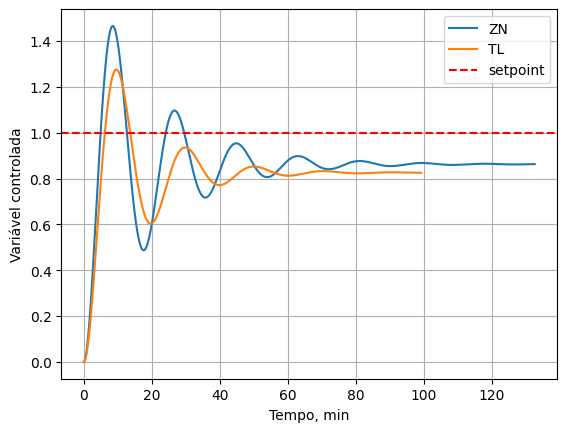

In [15]:
# Parâmetros do controlador
sintonia_P = [['ZN', 2.52], ['TL', 1.9]]

for par in sintonia_P:
  metodo = par[0]
  Kc = par[1]
  Gc = PID_filtro(Kc)
  G_servo = ct.minreal(Gc*Gp/(1+Gc*Gp*Gm))
  G_reg = ct.minreal(Gd/(1+Gc*Gp*Gm))

  # Teste servo
  ts, ys = ct.step_response(G_servo)

  # Visualizar
  plt.plot(ts,ys, label = metodo)

plt.axhline(y=1,linestyle='--', color='r', label='setpoint')
plt.xlabel('Tempo, min')
plt.ylabel('Variável controlada')
plt.legend()
plt.grid()

# Executar os testes de desempenho

3 states have been removed from the model
0 states have been removed from the model
3 states have been removed from the model
0 states have been removed from the model


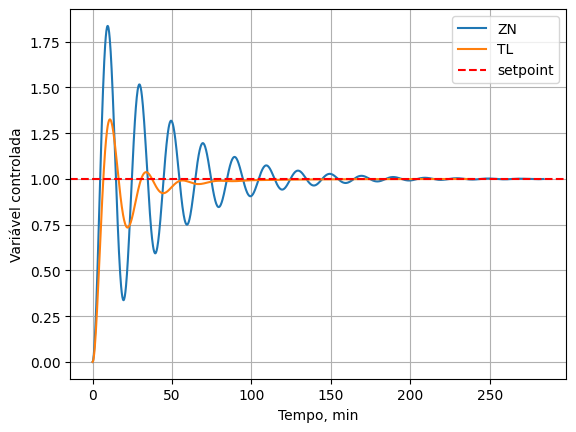

In [16]:
# Parâmetros do controlador
sintonia_PI = [['ZN', 2.25, 11.5 ], ['TL', 1.55, 30.0]]

for par in sintonia_PI:
  metodo = par[0]
  Kc = par[1]
  tauI = par[2]
  Gc = PID_filtro(Kc,tauI)
  G_servo = ct.minreal(Gc*Gp/(1+Gc*Gp*Gm))
  G_reg = ct.minreal(Gd/(1+Gc*Gp*Gm))

  # Teste servo
  ts, ys = ct.step_response(G_servo)

  # Visualizar
  plt.plot(ts,ys, label = metodo)

plt.axhline(y=1,linestyle='--', color='r', label='setpoint')
plt.xlabel('Tempo, min')
plt.ylabel('Variável controlada')
plt.legend()
plt.grid()